<a href="https://colab.research.google.com/github/LishaRudani/Pizza_Resturants_And_Pizza_Selling_Prediction/blob/main/Pizza_Restaurants_and_Pizza_they_Sell_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/Teach_Foundation_of_ML/project/Regression/archive.zip

unzip:  cannot find or open /content/drive/MyDrive/Teach_Foundation_of_ML/project/Regression/archive.zip, /content/drive/MyDrive/Teach_Foundation_of_ML/project/Regression/archive.zip.zip or /content/drive/MyDrive/Teach_Foundation_of_ML/project/Regression/archive.zip.ZIP.


In [ ]:
pizza_data=pd.read_csv('/content/drive/MyDrive/PizzaResturantSell_Dataset/pizza_data.csv')

In [ ]:
pizza_data.head()

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,...,menus.currency,menus.dateSeen,menus.description,menus.name,name,postalCode,priceRangeCurrency,priceRangeMin,priceRangeMax,province
0,AVz3Y-7h3D1zeR_xDAqm,2017-06-30T05:05:40Z,2019-05-01T15:43:09Z,4203 E Kiehl Ave,"Pizza,Restaurant,American restaurants,Pizza Pl...",Accommodation & Food Services,Sherwood,US,us/ar/sherwood/4203ekiehlave/-1051391616,34.832300,...,USD,"2018-05-01T04:25:37.197Z,2018-04-16T04:36:02.3...",NaN,Cheese Pizza,Shotgun Dans Pizza,72120,USD,0,25,AR
1,AVweGPFF_7pvs4fzAAzQ,2016-04-02T04:02:49Z,2019-05-01T15:27:50Z,25 E Camelback Rd,"Pizza,Pizza Place,Restaurants",Accommodation & Food Services,Phoenix,US,us/az/phoenix/25ecamelbackrd/-727422936,33.509266,...,USD,"2018-03-03T02:38:06.381Z,2018-01-18T20:18:10.0...",NaN,Pizza Cookie,Sauce Pizza Wine,85012,USD,0,25,AZ
2,AVwdRGa9_7pvs4fz4E3K,2016-03-03T18:39:49Z,2019-05-01T12:52:25Z,3703 Paxton Ave,"Restaurant,Pizza Place,Restaurants",Accommodation & Food Services,Cincinnati,US,us/oh/cincinnati/3703paxtonave/-619797122,39.144883,...,USD,"2018-04-10T07:58:34.585Z,2018-04-21T05:43:21.4...",a saucelessampcomma double cheese pizza with a...,Pizza Blanca,Mios Pizzeria,45209,USD,0,25,OH
3,AVwdX4psIN2L1WUfvJB1,2016-03-29T05:08:59Z,2019-05-01T12:52:20Z,30495 John R Rd,"Pizza,Carry-out food,Pizza Place,Restaurants",Accommodation & Food Services,Madison Heights,US,us/mi/madisonheights/30495johnrrd/-874863116,42.516669,...,USD,"2016-10-20T21:50:02Z,2016-03-29T05:08:59Z",NaN,Small Pizza,Hungry Howies Pizza,48071,USD,25,40,MI
4,AVwdaeTtkufWRAb55pSH,2016-03-31T02:34:04Z,2019-05-01T12:50:45Z,3600 Eastern Ave,"Pizza,American restaurants,Pizza Place,Pizza e...",Accommodation & Food Services,Baltimore,US,us/md/baltimore/3600easternave/-1270965359,39.286630,...,USD,2016-03-31T02:34:04Z,NaN,Pizza Sub,Spartan Pizzeria,21224,USD,0,25,MD


In [ ]:
pizza_data.tail()

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,...,menus.currency,menus.dateSeen,menus.description,menus.name,name,postalCode,priceRangeCurrency,priceRangeMin,priceRangeMax,province
9995,AVwdKXFYByjofQCxmIyZ,2016-03-21T00:12:46Z,2018-01-08T10:25:27Z,1126 E Lovejoy St,Pizza Place,Accommodation & Food Services,Buffalo,US,us/ny/buffalo/1126elovejoyst/1921210585,42.889759,...,USD,"2017-12-11T12:44:00.000Z,2016-03-21T00:13:00.0...",NaN,Super Steak Pizza,Carbone's Pizzeria,14206,USD,0,25,NY
9996,AVwdKXFYByjofQCxmIyZ,2016-03-21T00:12:46Z,2018-01-08T10:25:27Z,1126 E Lovejoy St,Pizza Place,Accommodation & Food Services,Buffalo,US,us/ny/buffalo/1126elovejoyst/1921210585,42.889759,...,USD,2017-12-11T12:44:00.000Z,NaN,Large Cheese & 1 Item Pizza,Carbone's Pizzeria,14206,USD,0,25,NY
9997,AVz6kzsQFcQ3k02bDhwQ,2017-06-30T19:56:11Z,2018-01-07T10:51:29Z,3641 E Main St,"Pizza Place,Restaurants",Accommodation & Food Services,Saint Charles,US,us/il/saintcharles/3641emainst/1336179832,41.921300,...,USD,"2017-12-10T18:55:00.000Z,2017-10-28T21:52:00.000Z",NaN,"Individual 6"" Pepperoni Stuffed Deep Dish Pizza",Giordano's Pizza,60174,USD,0,25,IL
9998,AVz6kzsQFcQ3k02bDhwQ,2017-06-30T19:56:11Z,2018-01-07T10:51:29Z,3641 E Main St,"Pizza Place,Restaurants",Accommodation & Food Services,Saint Charles,US,us/il/saintcharles/3641emainst/1336179832,41.921300,...,USD,"2017-12-10T18:55:00.000Z,2017-10-28T21:52:00.000Z",NaN,"Individual 6"" Cheese Stuffed Deep Dish Pizza",Giordano's Pizza,60174,USD,0,25,IL
9999,AVwdG9zTkufWRAb52Y2A,2015-10-23T01:57:27Z,2018-01-04T17:57:59Z,7460 W Lake Mead Blvd,"Pizza Place,Restaurant,Fast Food,Pizza",Accommodation & Food Services,Las Vegas,US,us/nv/lasvegas/7460wlakemeadblvd/330000776,36.196180,...,USD,"2017-12-08T19:07:00.000Z,2017-10-28T22:35:00.000Z",NaN,King Arthur's Supreme Pizza,Round Table Pizza,89128,USD,0,25,NV


In [ ]:
pizza_data.shape

(10000, 24)

In [ ]:
pizza_data.columns

Index(['id', 'dateAdded', 'dateUpdated', 'address', 'categories',
       'primaryCategories', 'city', 'country', 'keys', 'latitude', 'longitude',
       'menuPageURL', 'menus.amountMax', 'menus.amountMin', 'menus.currency',
       'menus.dateSeen', 'menus.description', 'menus.name', 'name',
       'postalCode', 'priceRangeCurrency', 'priceRangeMin', 'priceRangeMax',
       'province'],
      dtype='object')

In [ ]:
pizza_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  10000 non-null  object 
 1   dateAdded           10000 non-null  object 
 2   dateUpdated         10000 non-null  object 
 3   address             10000 non-null  object 
 4   categories          10000 non-null  object 
 5   primaryCategories   10000 non-null  object 
 6   city                10000 non-null  object 
 7   country             10000 non-null  object 
 8   keys                10000 non-null  object 
 9   latitude            10000 non-null  float64
 10  longitude           10000 non-null  float64
 11  menuPageURL         1679 non-null   object 
 12  menus.amountMax     10000 non-null  float64
 13  menus.amountMin     10000 non-null  float64
 14  menus.currency      10000 non-null  object 
 15  menus.dateSeen      10000 non-null  object 
 16  menus

In [ ]:
pizza_data.describe()

,latitude,longitude,menus.amountMax,menus.amountMin,priceRangeMin,priceRangeMax
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,38.371895,-90.063800,14.032670,13.416902,4.655500,27.764200
std,4.573537,17.340379,17.607233,10.742678,9.828412,6.017526
min,21.421326,-157.802443,0.000000,0.000000,0.000000,7.000000
25%,34.422946,-104.801126,8.490000,8.000000,0.000000,25.000000
50%,40.118880,-82.909949,13.390000,12.990000,0.000000,25.000000
75%,40.905048,-75.194741,17.950000,16.990000,0.000000,25.000000
max,64.850500,-71.946170,1395.000000,243.000000,50.000000,55.000000


In [ ]:
pizza_data.isnull().sum()

id                       0
dateAdded                0
dateUpdated              0
address                  0
categories               0
primaryCategories        0
city                     0
country                  0
keys                     0
latitude                 0
longitude                0
menuPageURL           8321
menus.amountMax          0
menus.amountMin          0
menus.currency           0
menus.dateSeen           0
menus.description     6282
menus.name               0
name                     0
postalCode               4
priceRangeCurrency       0
priceRangeMin            0
priceRangeMax            0
province                 0
dtype: int64

In [ ]:
pizza_data = pizza_data.drop(['menuPageURL','menus.description','postalCode'], axis =1)

In [ ]:
pizza_data.shape

(10000, 21)

In [ ]:
pizza_data.nunique()


id                    2285
dateAdded             2214
dateUpdated           2193
address               2278
categories             456
primaryCategories        8
city                  1028
country                  1
keys                  2285
latitude              2284
longitude             2284
menus.amountMax        773
menus.amountMin        762
menus.currency           1
menus.dateSeen        6303
menus.name            4749
name                  1827
priceRangeCurrency       1
priceRangeMin           10
priceRangeMax           14
province                44
dtype: int64

In [ ]:
pizza_data['primaryCategories'].unique()

array(['Accommodation & Food Services',
       'Management of Companies & Enterprises',
       'Retail,Accommodation & Food Services',
       'Accommodation & Food Services,Management of Companies & Enterprises',
       'Retail',
       'Wholesale Trade,Accommodation & Food Services,Manufacturing',
       'Wholesale Trade,Accommodation & Food Services',
       'Educational Services,Accommodation & Food Services'], dtype=object)

In [ ]:
pizza_data['primaryCategories'].value_counts()

Accommodation & Food Services                                          9909
Management of Companies & Enterprises                                    43
Accommodation & Food Services,Management of Companies & Enterprises      23
Retail,Accommodation & Food Services                                     11
Retail                                                                    9
Wholesale Trade,Accommodation & Food Services                             2
Educational Services,Accommodation & Food Services                        2
Wholesale Trade,Accommodation & Food Services,Manufacturing               1
Name: primaryCategories, dtype: int64

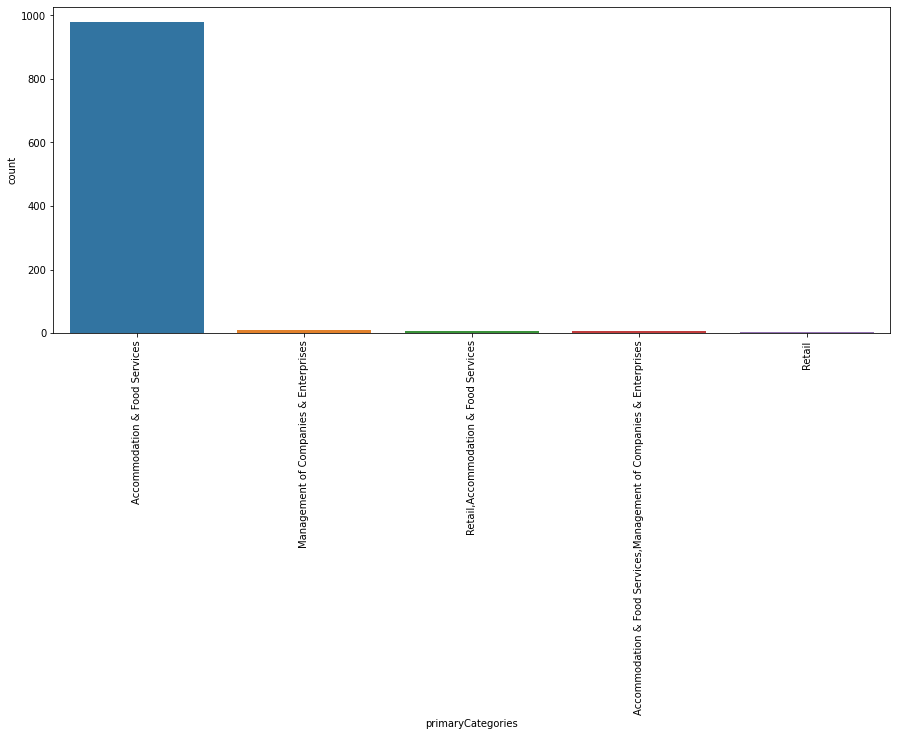

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot('primaryCategories', data = pizza_data.head(1000))
plt.xticks(rotation = 90)
plt.show()

In [ ]:
pizza_data['categories'].unique()

array(['Pizza,Restaurant,American restaurants,Pizza Place,Restaurants',
       'Pizza,Pizza Place,Restaurants',
       'Restaurant,Pizza Place,Restaurants',
       'Pizza,Carry-out food,Pizza Place,Restaurants',
       'Pizza,American restaurants,Pizza Place,Pizza equipment and supplies,Restaurants',
       'Pizza Place',
       'Restaurant,Italian Restaurant,Pizza Place,Italian Restaurant and Pizza Place',
       'Pizza,Restaurant,Pizza Place',
       'Pizza,Restaurant,Pizza Place,Restaurants',
       'Pizza,American restaurants,Pizza Place,Restaurants',
       'Restaurant,Pizza Place Upper East Side,Pizza Place',
       'Restaurant,Pizza Place', 'Indian Restaurant,Pizza Place',
       'Pizza,Restaurant,Karaoke,Pizza Place,Restaurants',
       'Italian Restaurant,Pizza Place,Italian Restaurant and Pizza Place',
       'Italian Restaurant,Pizza Place',
       'American Restaurant,Pizza Place',
       'Pizza,Restaurant,Italian Restaurant,Pizza Place,Restaurants',
       'Pizza,Restauran

In [ ]:
pizza_data['categories'].value_counts()

Restaurant,Pizza Place                                                                                 2690
Pizza Place                                                                                            2209
Pizza,Restaurant,Pizza Place,Restaurants                                                                370
Italian Restaurant,Pizza Place                                                                          312
Restaurant,Pizza Place,Restaurants                                                                      293
                                                                                                       ... 
Bar,Pizza Place,Pizza Place and Bar                                                                       1
Pizza Place, Sandwich Place, and American Restaurant,Pizza Place,Restaurants                              1
Pizza,Restaurant,Pizza Restaurants,Caterers,Pizza Place,Pizza Place East Falls,Catering,Restaurants       1
Pizza,Franchising,Pizza Plac

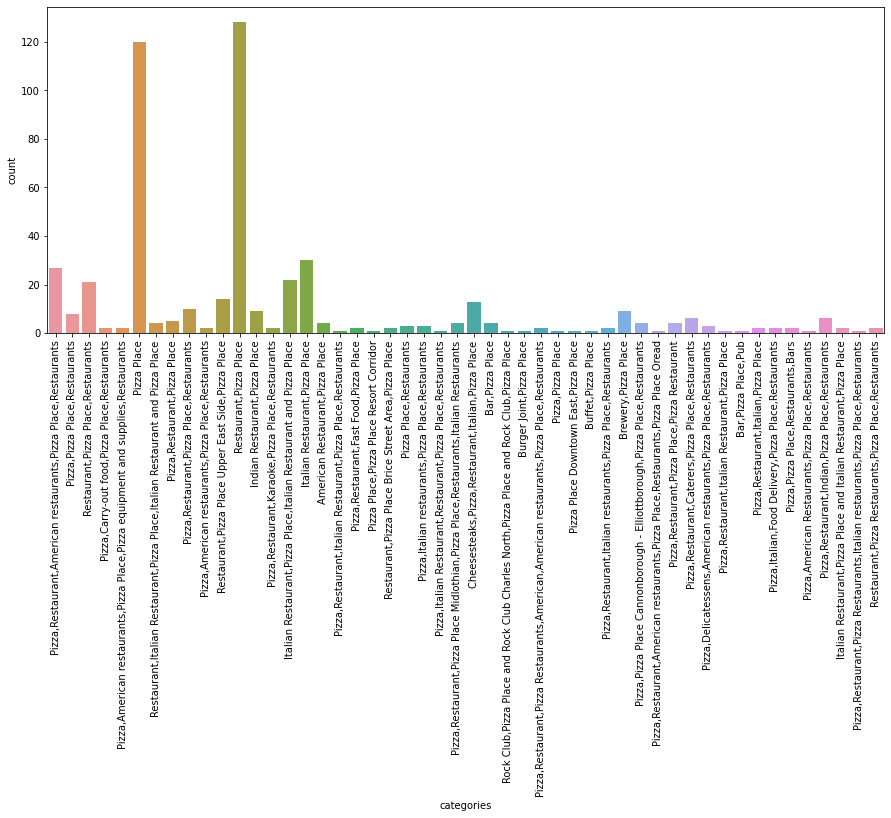

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot('categories', data = pizza_data.head(500))
plt.xticks(rotation = 90)
plt.show()

In [ ]:
pizza_data['city'].unique()

array(['Sherwood', 'Phoenix', 'Cincinnati', ..., 'Red Hook',
       'South Holland', 'Palmer'], dtype=object)

In [ ]:
pizza_data['city'].value_counts()

New York        655
Brooklyn        460
Los Angeles     193
Buffalo         178
Philadelphia    140
               ... 
Edmonds           1
Bend              1
Fox Lake          1
Bellevue          1
Palmer            1
Name: city, Length: 1028, dtype: int64

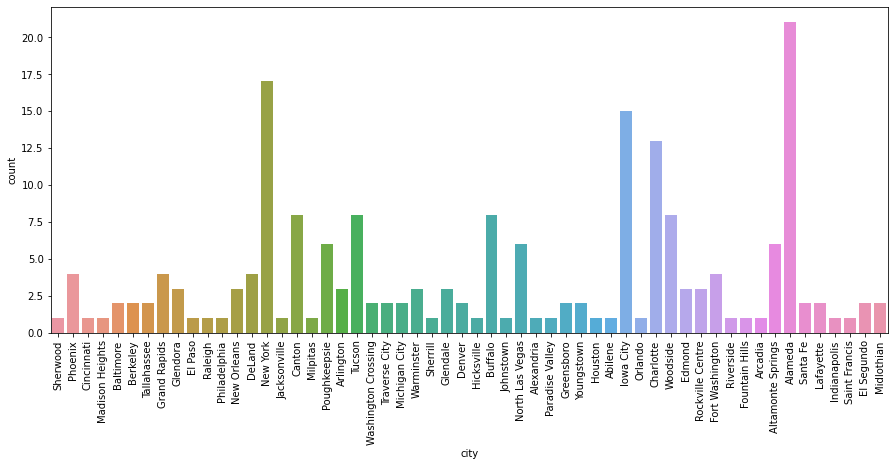

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot('city', data = pizza_data.head(200))
plt.xticks(rotation = 90)
plt.show()

In [ ]:
pizza_data['menus.amountMax'].unique()

array([7.9800e+00, 6.0000e+00, 6.4900e+00, 5.9900e+00, 5.4900e+00,
       1.0990e+01, 4.9900e+00, 5.3900e+00, 2.5000e+00, 1.1990e+01,
       7.4300e+00, 1.8210e+01, 1.5920e+01, 2.2000e+01, 1.1500e+01,
       7.0000e+00, 5.0000e+00, 4.5000e+00, 1.2250e+01, 1.3500e+01,
       4.8900e+00, 6.9900e+00, 1.9990e+01, 1.1750e+01, 3.7500e+00,
       3.5000e+00, 1.9250e+01, 1.6950e+01, 1.2500e+01, 1.7750e+01,
       1.3750e+01, 1.8750e+01, 1.2000e+01, 1.8950e+01, 1.9750e+01,
       7.9900e+00, 9.2000e+00, 1.8990e+01, 1.9900e+00, 6.9500e+00,
       1.2950e+01, 1.0000e+00, 8.9900e+00, 8.4900e+00, 1.7000e+01,
       2.1000e+01, 1.0490e+01, 4.8500e+00, 1.2050e+01, 1.7500e+00,
       1.2990e+01, 9.2500e+00, 5.9500e+00, 1.5000e+00, 2.2490e+01,
       3.2990e+01, 1.5990e+01, 1.7990e+01, 1.6990e+01, 4.2900e+00,
       5.7500e+00, 2.0990e+01, 4.9990e+01, 9.9900e+00, 1.4990e+01,
       1.5950e+01, 3.9900e+00, 5.5000e+00, 4.2500e+00, 1.3000e+01,
       1.5000e+01, 1.0000e+01, 3.0000e+00, 1.4000e+01, 1.4950e

In [ ]:
pizza_data['menus.amountMax'].value_counts()

16.00    220
15.00    192
14.00    186
9.99     183
13.99    169
        ... 
7.07       1
18.69      1
23.39      1
28.60      1
10.10      1
Name: menus.amountMax, Length: 773, dtype: int64

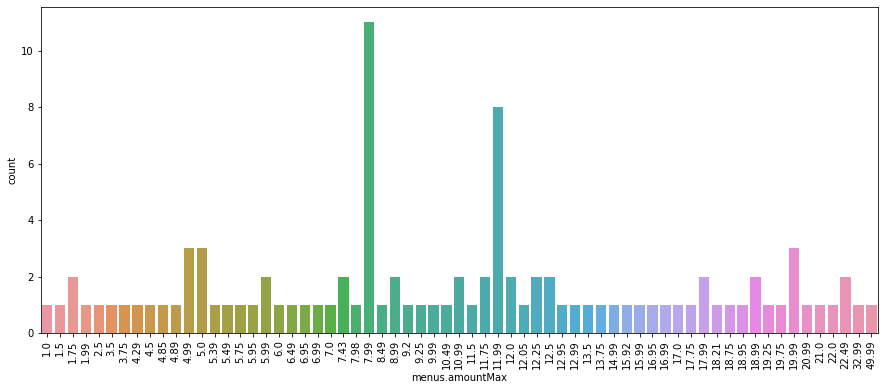

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot('menus.amountMax', data = pizza_data.head(100))
plt.xticks(rotation = 90)
plt.show()


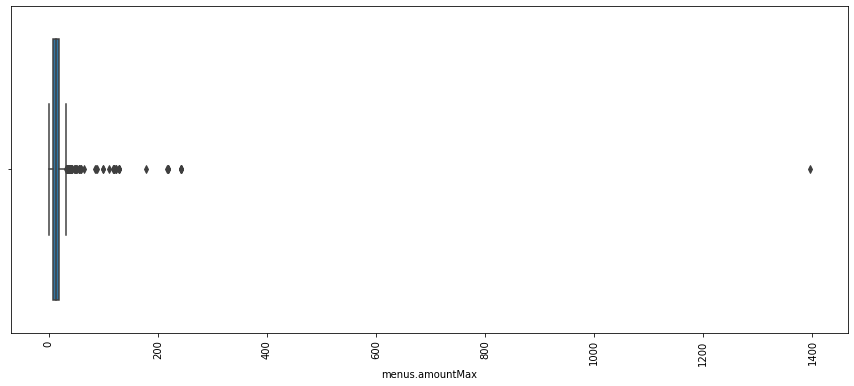

In [ ]:
plt.figure(figsize=(15,6))
sns.boxplot('menus.amountMax', data = pizza_data)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
pizza_data['menus.amountMin'].unique()

array([  7.98,   6.  ,   6.49,   5.99,   5.49,  10.99,   4.99,   5.39,
         2.5 ,  11.99,   7.43,  18.21,  15.92,  22.  ,  11.5 ,   7.  ,
         5.  ,   4.5 ,  12.25,  13.5 ,   4.89,   6.99,  19.99,  11.75,
         3.75,   3.5 ,  19.25,  16.95,  12.5 ,  17.75,  13.75,  18.75,
        12.  ,  18.95,  19.75,   7.99,   9.2 ,  18.99,   1.99,   6.95,
        12.95,   1.  ,   8.99,   8.49,  17.  ,  21.  ,  10.49,   4.85,
        12.05,   1.75,  12.99,   9.25,   5.95,   1.5 ,  22.49,  15.99,
        17.99,  16.99,   4.29,   5.75,  14.99,  49.99,   9.99,  15.95,
         3.99,   5.5 ,   4.25,  13.  ,  15.  ,  10.  ,   3.  ,  14.  ,
        14.95,  13.95,  21.99,  15.75,  20.99,  16.  ,  16.25,  18.25,
        24.  ,   4.59,  14.45,   9.5 ,   2.  ,  20.  ,   6.25,  11.95,
         4.  ,   2.15,  15.49,   8.25,  27.  ,   2.75,   9.  ,  20.49,
        16.49,  17.29,  16.79,  13.79,  12.49,  14.89,  14.29,  11.49,
        15.79,  17.49,  13.49,  12.79,  16.29,  17.89,   6.5 ,  18.  ,
      

In [ ]:
pizza_data['menus.amountMin'].value_counts()

16.00    219
15.00    197
13.99    191
9.99     189
14.00    188
        ... 
32.45      1
29.55      1
9.40       1
19.77      1
10.10      1
Name: menus.amountMin, Length: 762, dtype: int64

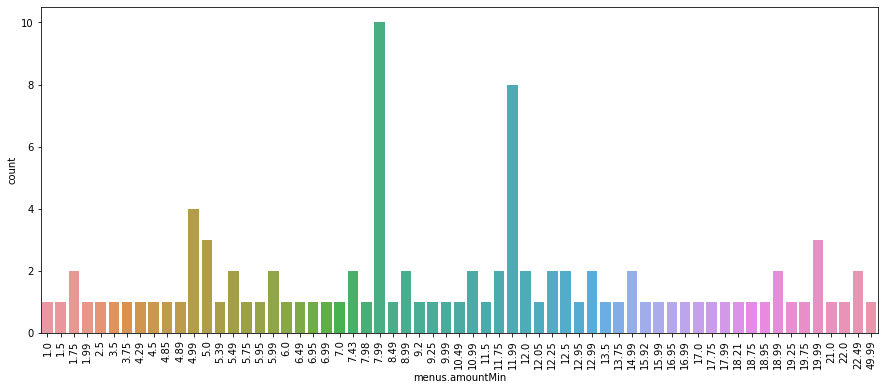

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot('menus.amountMin', data = pizza_data.head(100))
plt.xticks(rotation = 90)
plt.show()

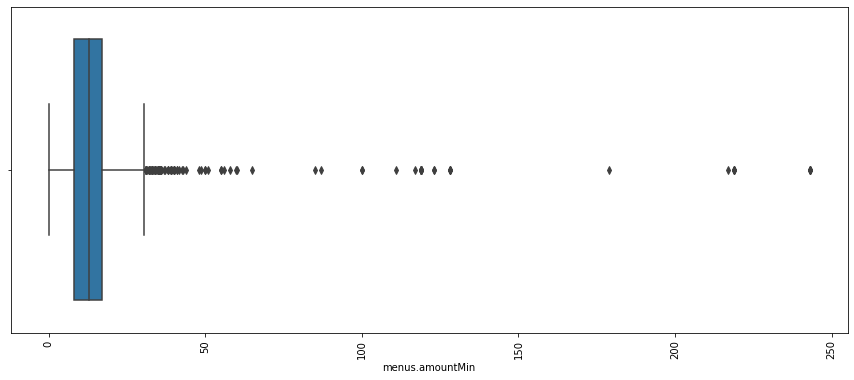

In [ ]:
plt.figure(figsize=(15,6))
sns.boxplot('menus.amountMin', data = pizza_data)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
pizza_data['priceRangeMin'].unique()

array([ 0, 25, 40,  1, 50,  3,  2, 10,  5, 20])

In [ ]:
pizza_data['priceRangeMin'].value_counts()

0     8007
25    1801
1      133
40      21
2       16
50       9
5        6
3        5
10       1
20       1
Name: priceRangeMin, dtype: int64

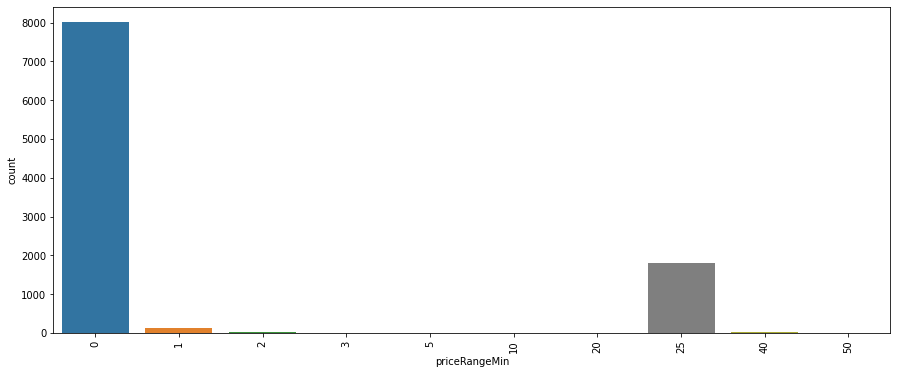

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot('priceRangeMin', data = pizza_data)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
plt.figure(figsize=(15,6))
sns.boxplot('priceRangeMin', data = pizza_data)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
pizza_data['priceRangeMax'].unique()


array([25, 40, 30,  7, 55, 26, 24, 33, 20, 35, 18, 19, 22, 10])

In [ ]:
pizza_data['priceRangeMax'].value_counts()

25    8016
40    1801
26      58
55      30
22      28
20      18
30      16
10      16
33       8
18       4
7        2
24       1
35       1
19       1
Name: priceRangeMax, dtype: int64

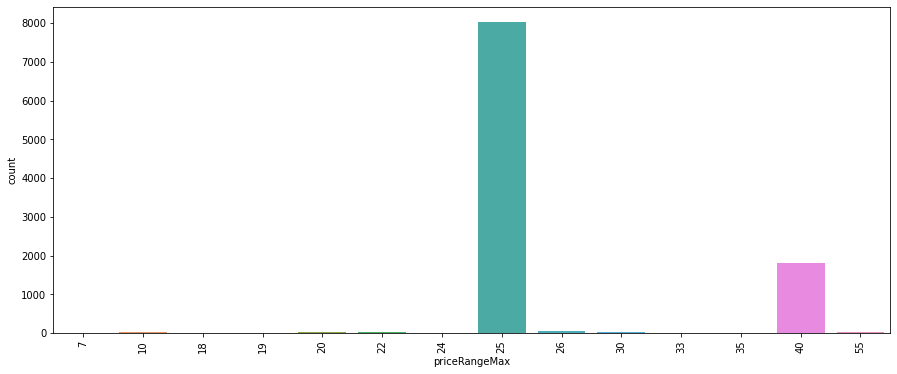

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot('priceRangeMax', data = pizza_data)
plt.xticks(rotation = 90)
plt.show()

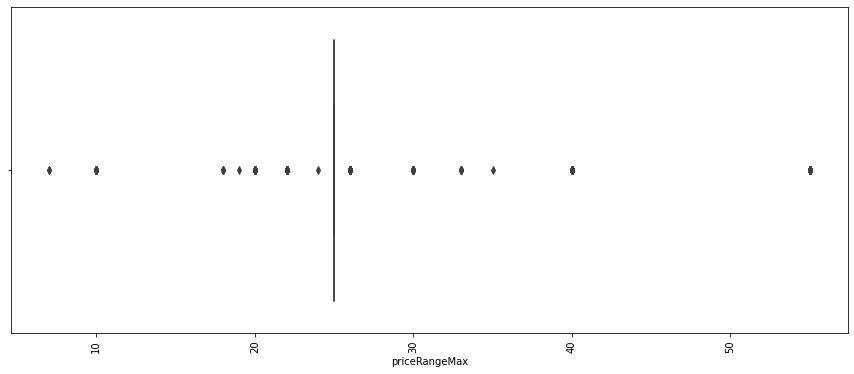

In [ ]:
plt.figure(figsize=(15,6))
sns.boxplot('priceRangeMax', data = pizza_data)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
pizza_data['province'].unique()

array(['AR', 'AZ', 'OH', 'MI', 'MD', 'CA', 'FL', 'TX', 'NC', 'PA', 'LA',
       'NY', 'IN', 'CO', 'NV', 'IA', 'OK', 'NM', 'WI', 'VA', 'OR', 'MN',
       'TN', 'WA', 'SC', 'MS', 'MO', 'GA', 'IL', 'DE', 'KS', 'UT', 'KY',
       'NE', 'SD', 'WV', 'AL', 'AK', 'ID', 'CT', 'HI', 'NJ', 'ND', 'MT'],
      dtype=object)

In [ ]:
pizza_data['province'].value_counts()

NY    2640
CA    1386
PA     814
FL     601
TX     485
IL     381
MI     366
OH     324
AZ     288
WA     262
NC     256
VA     237
IN     219
GA     214
NV     149
WI     140
CO     138
OR     122
MD     118
UT     107
MN      96
MO      95
SC      81
KY      77
TN      66
IA      53
NM      46
AR      40
KS      38
OK      27
WV      27
LA      25
NE      25
DE      19
MS       8
ID       6
AL       5
NJ       4
SD       3
AK       3
ND       3
CT       2
HI       2
MT       2
Name: province, dtype: int64

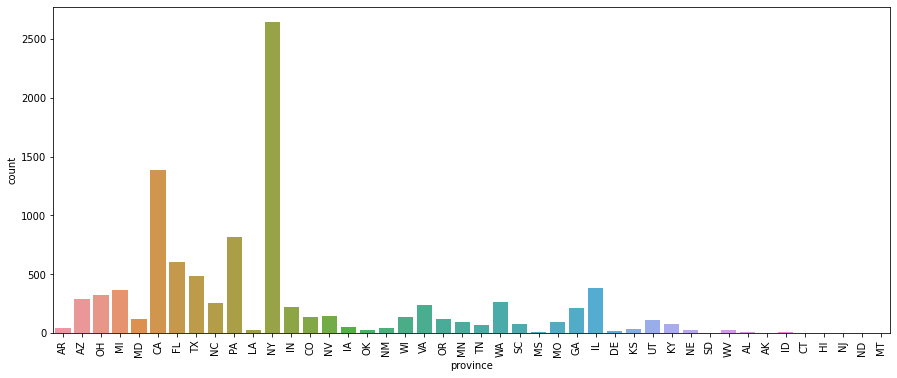

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot('province', data = pizza_data)
plt.xticks(rotation = 90)
plt.show()

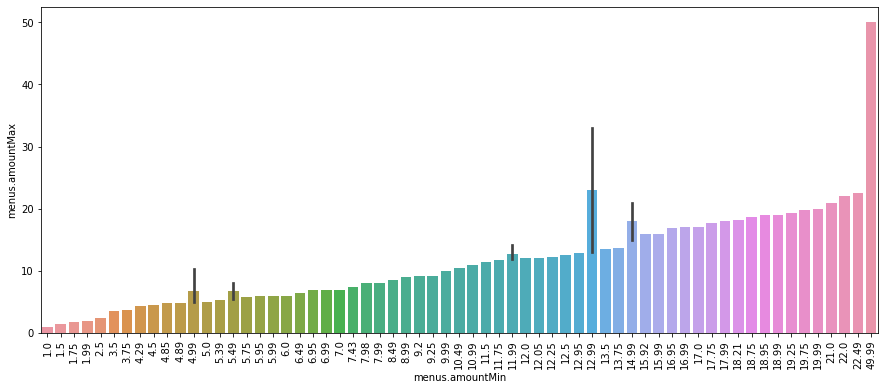

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(y = 'menus.amountMax', x = 'menus.amountMin',
data = pizza_data.head(100))
plt.xticks(rotation = 90)
plt.show()

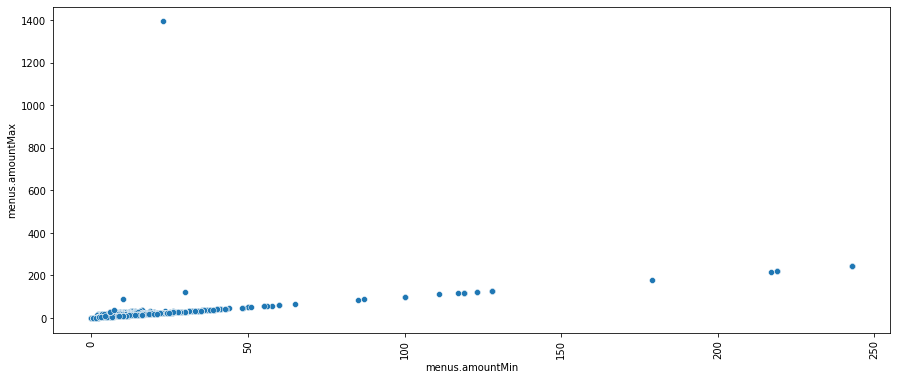

In [ ]:
plt.figure(figsize=(15,6))
sns.scatterplot(y = 'menus.amountMax', x = 'menus.amountMin',
data = pizza_data)
plt.xticks(rotation = 90)
plt.show()

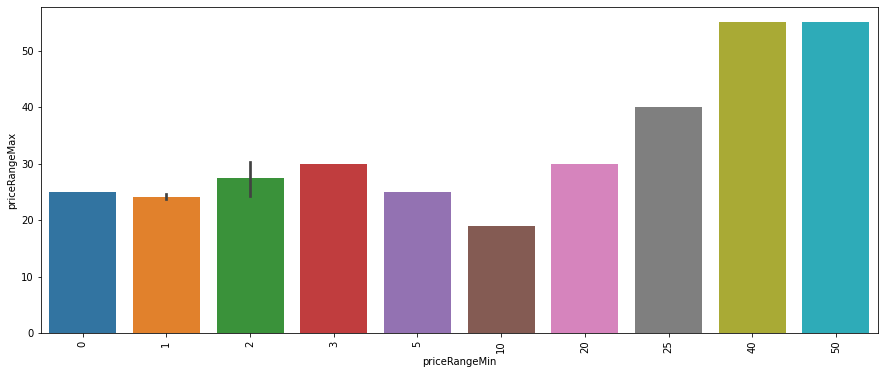

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(y = 'priceRangeMax', x = 'priceRangeMin',
data = pizza_data)
plt.xticks(rotation = 90)
plt.show()

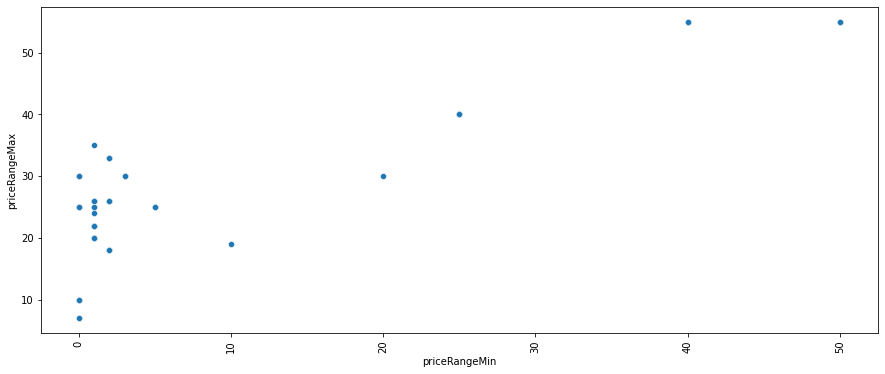

In [ ]:
plt.figure(figsize=(15,6))
sns.scatterplot(y = 'priceRangeMax', x = 'priceRangeMin',
data = pizza_data)
plt.xticks(rotation = 90)
plt.show()

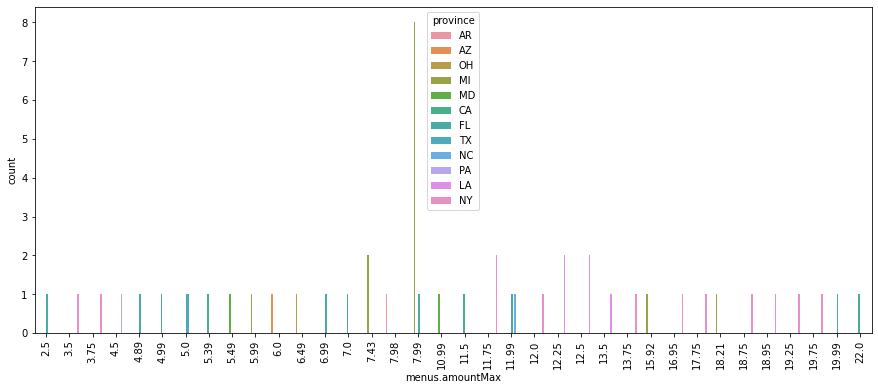

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot('menus.amountMax', hue = 'province', data = pizza_data.head(50))
plt.xticks(rotation = 90)
plt.show()

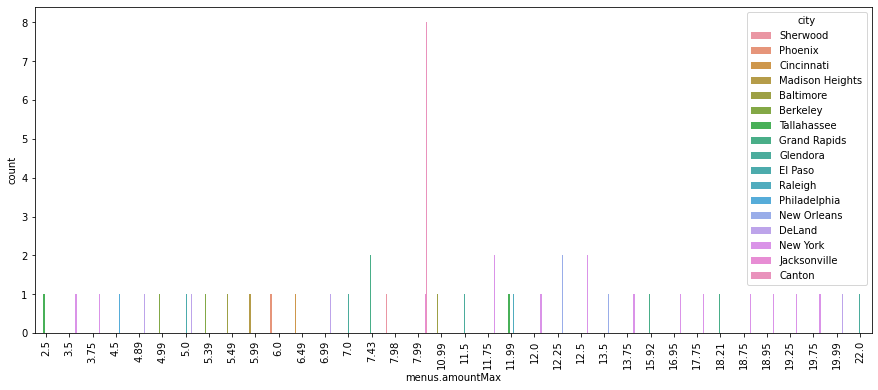

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot('menus.amountMax', hue = 'city', data = pizza_data.head(50))
plt.xticks(rotation = 90)
plt.show()


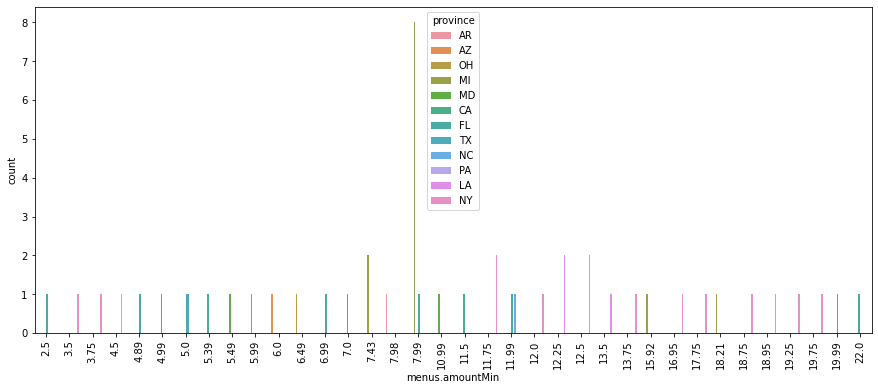

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot('menus.amountMin', hue = 'province', data = pizza_data.head(50))
plt.xticks(rotation = 90)
plt.show()

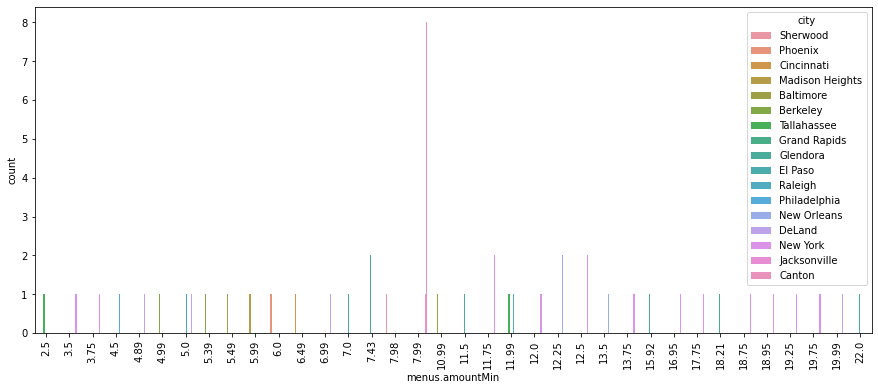

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot('menus.amountMin', hue = 'city', data = pizza_data.head(50))
plt.xticks(rotation = 90)
plt.show()

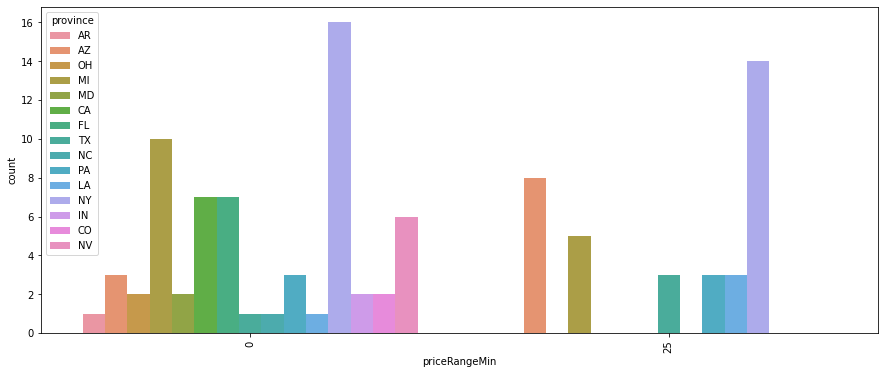

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot('priceRangeMin', hue = 'province', data = pizza_data.head(100))
plt.xticks(rotation = 90)
plt.show()

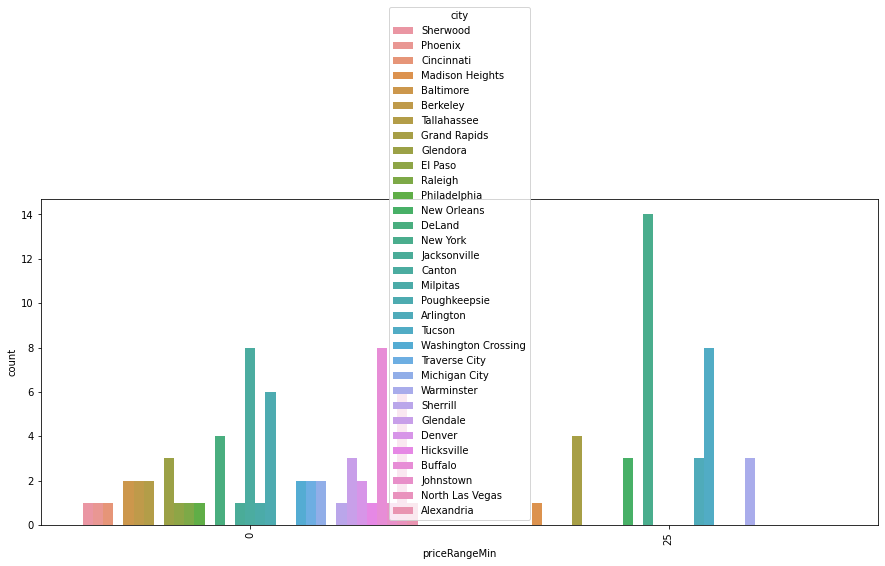

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot('priceRangeMin', hue = 'city', data = pizza_data.head(100))
plt.xticks(rotation = 90)
plt.show()

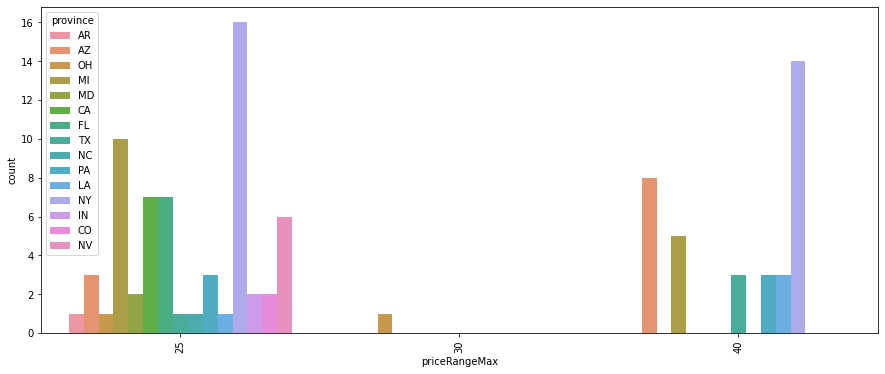

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot('priceRangeMax', hue = 'province', data = pizza_data.head(100))
plt.xticks(rotation = 90)
plt.show()


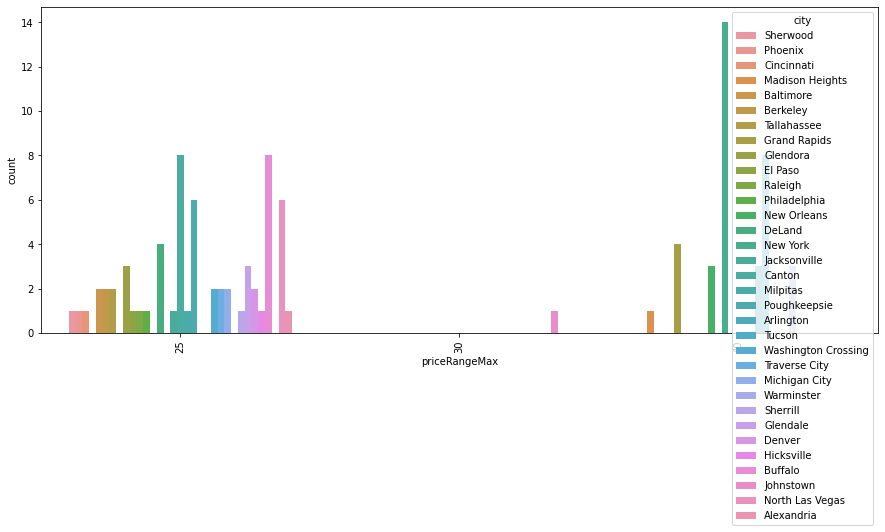

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot('priceRangeMax', hue = 'city', data = pizza_data.head(100))
plt.xticks(rotation = 90)
plt.show()

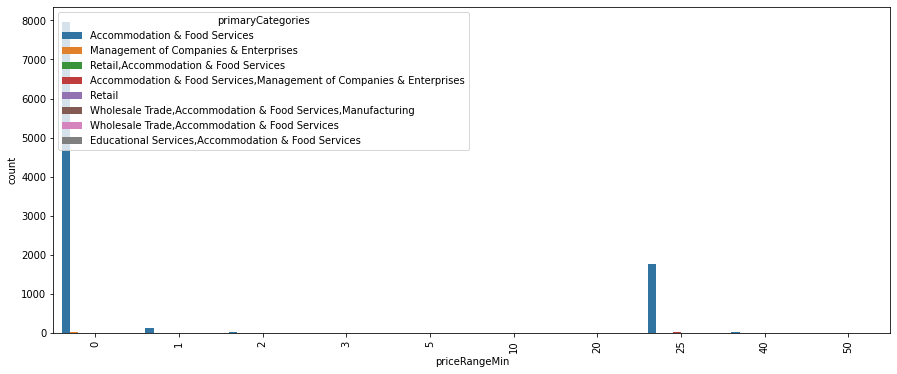

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot('priceRangeMin', hue = 'primaryCategories', data = pizza_data)
plt.xticks(rotation = 90)
plt.show()


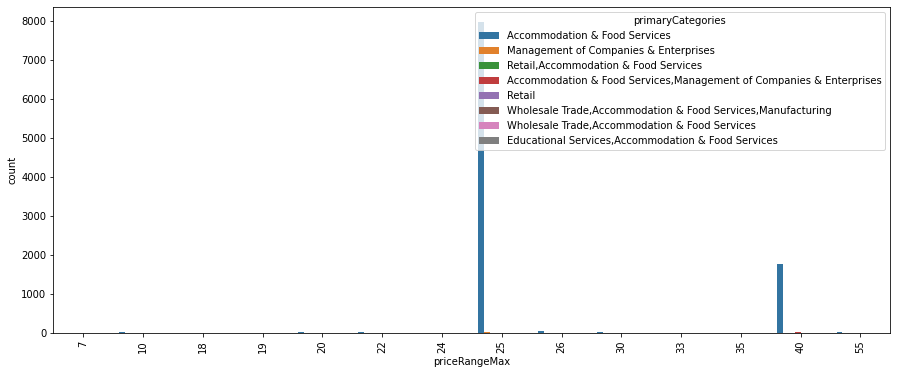

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot('priceRangeMax', hue = 'primaryCategories', data = pizza_data)
plt.xticks(rotation = 90)
plt.show()

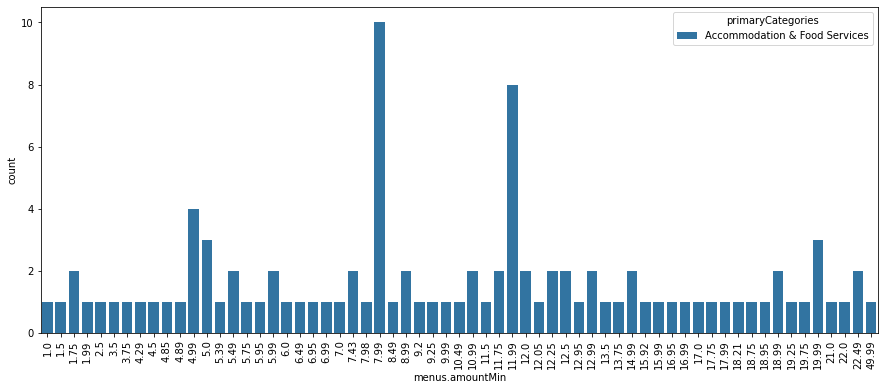

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot('menus.amountMin', hue = 'primaryCategories', data = pizza_data.head(100))
plt.xticks(rotation = 90)
plt.show()

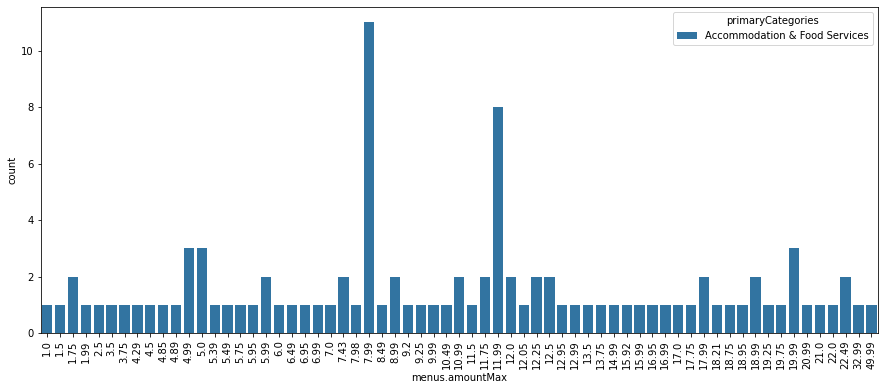

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot('menus.amountMax', hue = 'primaryCategories', data = pizza_data.head(100))
plt.xticks(rotation = 90)
plt.show()

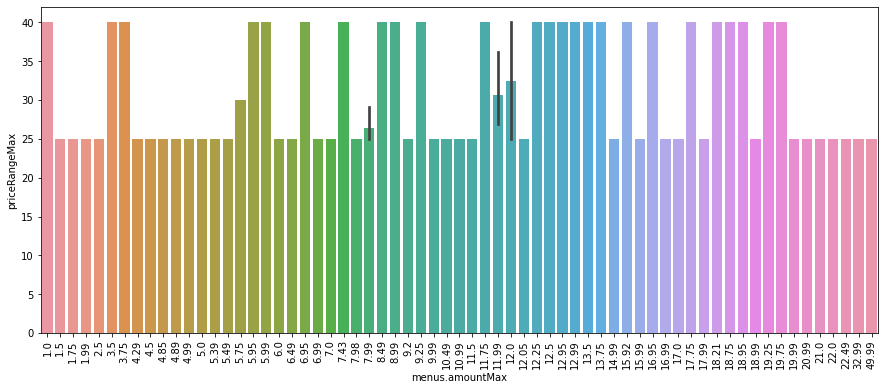

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(y = 'priceRangeMax', x = 'menus.amountMax',
data = pizza_data.head(100))
plt.xticks(rotation = 90)
plt.show()

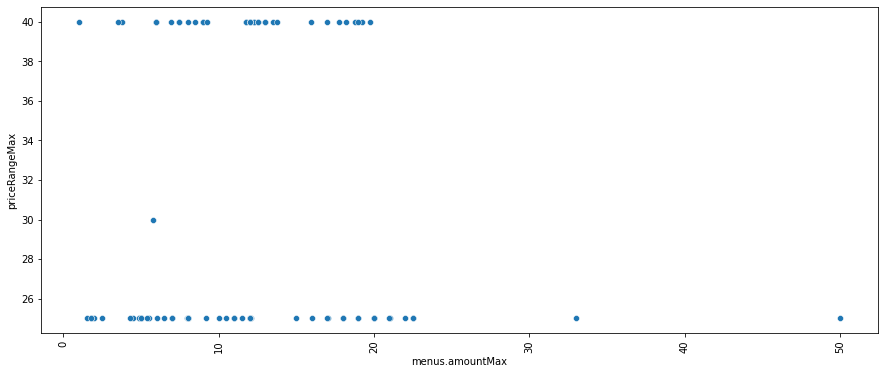

In [ ]:
plt.figure(figsize=(15,6))
sns.scatterplot(y = 'priceRangeMax', x = 'menus.amountMax',
data = pizza_data.head(100))
plt.xticks(rotation = 90)
plt.show()

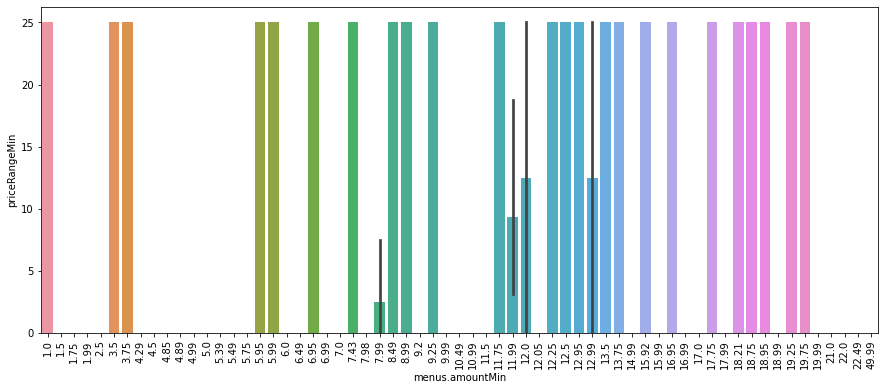

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(y = 'priceRangeMin', x = 'menus.amountMin',
data = pizza_data.head(100))
plt.xticks(rotation = 90)
plt.show()


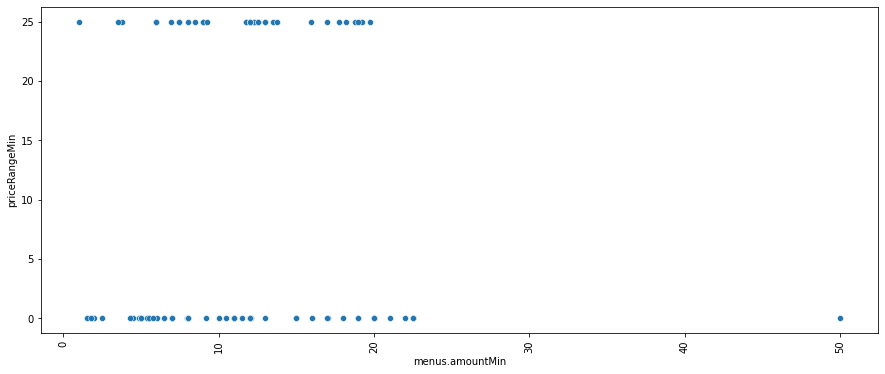

In [ ]:
plt.figure(figsize=(15,6))
sns.scatterplot(y = 'priceRangeMin', x = 'menus.amountMin',
data = pizza_data.head(100))
plt.xticks(rotation = 90)
plt.show()